## Business Problem
The dataset is used to help the company understand customer churn by identifying behavioral and service-related patterns that indicate why customers leave or switch to another provider. The analysis also supports the development of effective retention strategies, such as targeted offers or service improvements, for customers who are at high risk of churning.


In [1]:
import pandas as pd

df = pd.read_csv('data/telecom_churn.csv')

print("=============================================")
print("ini adalah ringkasan informasi dari dataset ")
print("=============================================")
df.info()
df.shape
df.describe(include='all').T

ini adalah ringkasan informasi dari dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [2]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## Data Understanding

### Dataset Overview
- The dataset contains 3333 rows and 11 columns.
- The target variable is `Churn`.
- Some categorical features indicating ContractRenewal, DataPlan, and Churn as target variabel
- Most features are numerical ,such as DataUsage and monthly charges show wide variation.

### Initial Observations

- There are no missing values across the dataset, indicating good data quality.
- The average number of customer service calls is relatively low (1–2 calls), although some customers contacted customer service up to 9 times, which may indicate potential dissatisfaction.
- Only around 27% of customers subscribe to a data plan, while most customers rely primarily on voice and SMS services.
- The overall churn rate is approximately 14.49%, meaning that about one in seven customers has churned.


## Exploratry Data Analysis
### Does the number of customer service calls relate to churn?


In [3]:
cs_summary = (
    df.groupby('CustServCalls')
      .agg(
          churn_rate=('Churn', 'mean'),
          total_customers=('Churn', 'count')
      )
)

cs_summary['churn_rate'] = cs_summary['churn_rate'] * 100
cs_summary



,churn_rate,total_customers
CustServCalls,,
0,13.199426,697
1,10.330229,1181
2,11.462451,759
3,10.256410,429
4,45.783133,166
5,60.606061,66
6,63.636364,22
7,55.555556,9
8,50.000000,2


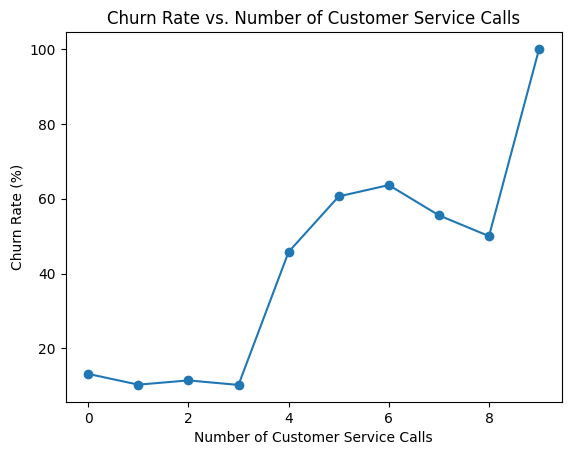

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.plot(cs_summary.index, cs_summary['churn_rate'], marker='o')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate vs. Number of Customer Service Calls')
plt.show()

### Customer Service Calls and Churn

Based on the analysis, customers who contacted customer service **0–3 times** show a relatively low and stable churn rate of around **10–13%**, representing the majority of customers in the dataset.

However, a significant increase in churn rate is observed starting at **4 customer service calls**, where churn jumps to **45.8%**. This suggests that customers who repeatedly contact customer service are more likely experiencing unresolved issues.

The churn rate continues to increase for customers making **5–6 calls**, exceeding **60%**, indicating a strong escalation effect. These customers are at high risk of churn and may require proactive retention actions.

Although churn reaches **100%** for customers with **9 calls**, this observation is based on a very small number of customers and should be interpreted with caution.


In [5]:
DataPlan_summary = (
    df.groupby('DataPlan')
      .agg(
          churn_rate=('Churn', 'mean'),
          total_customers=('Churn', 'count')
      )
)

DataPlan_summary['churn_rate'] *= 100
DataPlan_summary

,churn_rate,total_customers
DataPlan,,
0,16.715056,2411
1,8.676790,922


### 
0 = customers subscription
1 = customers no subsricption

## 
0 >>> there is 16% customers churn rate of  data plan variable >> 2411 customers
1 >>> 922 customers churn rate 8.67% 



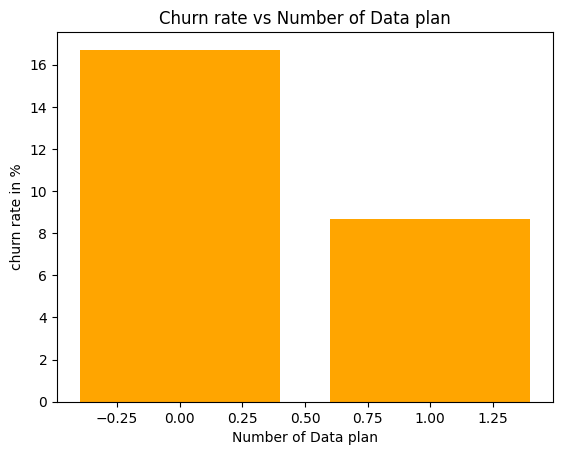

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(DataPlan_summary.index,
        DataPlan_summary['churn_rate'], color='orange')
plt.xlabel('Number of Data plan')
plt.ylabel('churn rate in %')
plt.title('Churn rate vs Number of Data plan')
plt.show()

### Data Plan Subscription and Customer Churn

The analysis shows a clear difference in churn behavior between customers who subscribe to a data plan and those who do not.

Customers **without a data plan** have a churn rate of **16.7%**, which is almost twice as high as customers **with a data plan**, whose churn rate is **8.7%**. This indicates that customers who only use voice and SMS services are more likely to switch providers.

One possible explanation is that customers with a data plan tend to have higher service engagement and stronger dependency on the provider’s services, making them less likely to churn.

Given that both groups consist of a substantial number of customers, this pattern appears to be meaningful rather than driven by small sample sizes.


In [7]:
df[['MonthlyCharge', 'Churn']].describe()

,MonthlyCharge,Churn
count,3333.000000,3333.000000
mean,56.305161,0.144914
std,16.426032,0.352067
min,14.000000,0.000000
25%,45.000000,0.000000
50%,53.500000,0.000000
75%,66.200000,0.000000
max,111.300000,1.000000


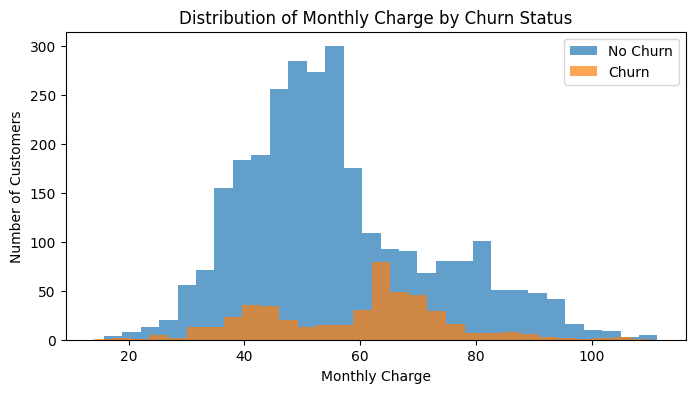

In [8]:
plt.figure(figsize=(8, 4))
plt.hist(df[df['Churn'] == 0]['MonthlyCharge'], bins=30, alpha=0.7, label='No Churn')
plt.hist(df[df['Churn'] == 1]['MonthlyCharge'], bins=30, alpha=0.7, label='Churn')
plt.xlabel('Monthly Charge')
plt.ylabel('Number of Customers')
plt.title('Distribution of Monthly Charge by Churn Status')
plt.legend()
plt.show()

### Monthly Charge and Customer Churn

Based on the distribution analysis, customers who churn tend to have higher monthly charges compared to customers who stay.

This is supported by summary statistics:
- The average monthly charge for churned customers is higher than non-churned customers.
- The median monthly charge shows a clearer difference, indicating that churned customers generally pay higher monthly fees.

This pattern suggests that customers with higher monthly charges may feel that the cost of the service does not match the value they receive, making them more likely to churn.


In [9]:
df.groupby('Churn')['MonthlyCharge'].mean()


Churn
0    55.816246
1    59.190062
Name: MonthlyCharge, dtype: float64

In [10]:
df.groupby('Churn')['MonthlyCharge'].median()

Churn
0    53.0
1    63.0
Name: MonthlyCharge, dtype: float64

In [12]:
df.groupby('Churn')['OverageFee'].mean()

Churn
0     9.954618
1    10.623085
Name: OverageFee, dtype: float64

In [13]:
df[['MonthlyCharge', 'CustServCalls', 'OverageFee', 'Churn']].corr()


,MonthlyCharge,CustServCalls,OverageFee,Churn
MonthlyCharge,1.000000,-0.028017,0.281766,0.072313
CustServCalls,-0.028017,1.000000,-0.012964,0.208750
OverageFee,0.281766,-0.012964,1.000000,0.092812
Churn,0.072313,0.208750,0.092812,1.000000


### Correlation Analysis (Churn Focus)

Correlation analysis shows that financial factors such as Monthly Charge (0.07) and Overage Fee (0.09) have very weak linear relationships with customer churn. This suggests that higher charges alone are not the primary drivers of customers leaving the service.

In contrast, the number of Customer Service Calls shows the strongest correlation with churn (0.21), indicating that customers who contact customer service more frequently are more likely to churn.

These findings reinforce earlier exploratory analysis, suggesting that customer churn is more strongly influenced by service experience and customer frustration rather than pricing factors. Improving service quality and reducing repeated customer complaints may therefore be more effective retention strategies than pricing adjustments alone.


## Final Conclusion

Based on data analysis of 3,333 telecom customers, it can be concluded that the churn rate is around 14.5% of the total number of customers. Exploratory and correlation analyses indicate that customers' decisions to unsubscribe are not primarily influenced by cost factors, but rather by their service experience.

Financial variables such as Monthly Charge and Overage Fee show a very weak correlation with churn. Customers with both high and low monthly charges are equally likely to churn, so price is not a major differentiating factor between customers who stay and those who leave.

Conversely, the number of calls to Customer Service (CustServCalls) shows the strongest relationship with churn compared to other numeric variables. Customers who frequently contact customer service have a significantly higher likelihood of churn. This finding is consistent with the visual analysis, which shows that the churn rate increases sharply after customers make more than 3–4 customer service calls.

This indicates that churn is driven more by dissatisfaction and frustration with service quality, rather than solely by price.


### Key Business Insights

- Price factors (Monthly Charge and Overage Fee) are not the primary drivers of churn.
- Customer service experience plays a more significant role in churn decisions.
- The frequency of customer service calls can be used as an early warning indicator of churn.
- High-paying customers don't always churn, but customers who frequently experience service issues tend to leave more quickly.

## Business Recommendations

1. Focus on Customer Service-Based Churn Prevention
Customers who make more than 3 calls to customer service should immediately be categorized as "high churn risk." The customer service team can be provided with an alert system to prioritize handling of these customers.

2. Improve the Quality of First Call Resolution
A high number of customer service calls indicates that problems are not resolved in a single interaction. Improving the quality of problem resolution in the first contact has the potential to significantly reduce churn rates.

3. Experience-Based Retention Strategy, Not Discounts
Because price does not have a strong correlation with churn, retention strategies should not only involve discounts or fee reductions, but also improve service quality, clearer communication, and faster resolutions.

4. Use CustServCalls as an Early Warning System
The number of calls to customer service can be a simple yet effective indicator for predicting churn without the need for machine learning models.